In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Users\\Vinay Dwivedi\\Downloads\\Video\\01.12.19\\P1_Amazon\\ratings_Electronics.csv")
df.columns = ["UserID", "Product", "Ratings", "TS"]
df.head()

# Adding columns to Headerless Dataset

,UserID,Product,Ratings,TS
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [7]:
df['Date'] = pd.to_datetime(df['TS'], unit='s')
df.info()

# Converting TimeStamp to DateTime format for possible future use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 5 columns):
UserID     object
Product    object
Ratings    float64
TS         int64
Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 298.5+ MB


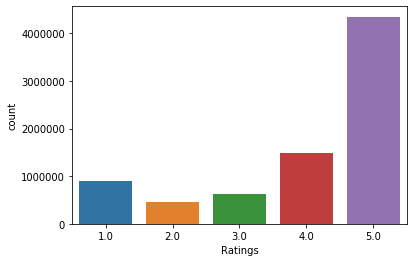

In [8]:
sns.countplot(x='Ratings',data=df)

# Most of the products are liked by the users

In [10]:
DF50 = df.groupby(['UserID']).filter(lambda x: len(x) >= 50)

# Selecting the records of only those Users who have reviewed at least 50 Products

In [192]:
DF50.groupby('UserID').count()

# All users are having more than 50 Products purchased

,Product,Ratings,TS,Date
UserID,,,,
A100UD67AHFODS,116,116,116,116
A100WO06OQR8BQ,132,132,132,132
A105S56ODHGJEK,68,68,68,68
A105TOJ6LTVMBG,71,71,71,71
A10AFVU66A79Y1,65,65,65,65
...,...,...,...,...
AZBXKUH4AIW3X,53,53,53,53
AZCE11PSTCH1L,60,60,60,60
AZMY6E8B52L2T,189,189,189,189


In [13]:
prod_rat = pd.DataFrame({
    'prd': DF50['Product'].unique(),
    'rtg': list(DF50.groupby('Product')['Ratings'].mean()),
    'cnt': list(DF50.groupby('Product')['Ratings'].count())
})

# Here a new dataframe prod_rat is formed from DF50 for analysis purpose, prod_rat have the product id,
# average ratings and total ratings as the columns, or UserID column is done away with

In [20]:
prod_rat.sort_values(['cnt', 'rtg'], ascending=[False, False]).head(20)

# Before any recommender algorithm is run, it can be seen that the list of top and positively reviewed
# products is available right away with us

,prd,rtg,cnt
39003,B0088CJT4U,4.218447,206
24827,B003ES5ZUU,4.864130,184
11078,B000N99BBC,4.772455,167
38250,B007WTAJTO,4.701220,164
38615,B00829TIEK,4.436242,149
38611,B00829THK0,4.416058,137
39338,B008DWCRQW,4.094891,137
21982,B002R5AM7C,4.125000,128
28761,B004CLYEDC,4.669492,118
22210,B002SZEOLG,4.247788,113


In [109]:
for col in list(DF50):
    print(col)
    print(pd.DataFrame(DF50[col].unique()).count())
    
# We can check thatin DF50, there are 1540 unique users who rated 48190 products overall with 5 ratings

UserID
0    1540
dtype: int64
Product
0    48190
dtype: int64
Ratings
0    5
dtype: int64
TS
0    4600
dtype: int64
Date
0    4600
dtype: int64


In [106]:
# Running surprise package for generating user-user and item-item recommender engines 

from surprise import KNNWithMeans, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

prod_rat_sur = Dataset.load_from_df(DF50[['UserID', 'Product', 'Ratings']], Reader())
trainset, testset = train_test_split(prod_rat_sur, test_size=.30)

In [108]:
#product-2 based collab filtering
algo_P = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_P.fit(trainset)

#user-2 based collab filtering
algo_U = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_U.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: 

In [165]:
# In order to avoid Memory Error, we will filter out rarely rated Products and as we can see that over
# 92.5% (44583/48190) of the books are rated 5 times or lesser, hence only those products will be considered 
# which are rated more than 5 times.

# 44583 = 30835+6975+2968+1723+1082

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(prod_rat.groupby('cnt')['prd'].count())


cnt
1      30835
2       6975
3       2968
4       1723
5       1082
6        796
7        637
8        495
9        416
10       327
11       266
12       238
13       184
14       163
15       130
16       114
17        72
18        86
19        79
20        54
21        55
22        28
23        29
24        41
25        29
26        33
27        31
28        28
29        19
30        21
31        16
32        14
33        17
34        12
35         6
36         9
37         6
38        10
39         9
40         8
41         9
42         8
43         2
44         4
45         7
46         5
47         6
48         6
49         5
50         3
51         2
52         4
53         2
54         5
55         1
57         2
58         1
59         1
60         3
61         2
63         2
64         3
66         1
67         2
69         2
70         2
71         1
72         1
74         2
76         3
77         2
78         2
79         1
80         1
81         1
82         1
84      

In [168]:
print(DF50.info())

DF2 = DF50.groupby(['Product']).filter(lambda x: len(x) >= 6)
print()

for col in list(DF2):
    print(col)
    print(DF2[col].count())
    
# It shows that data size has been reduced to about half i.e. 59880 from 125871

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 93 to 7824443
Data columns (total 5 columns):
UserID     125871 non-null object
Product    125871 non-null object
Ratings    125871 non-null float64
TS         125871 non-null int64
Date       125871 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.8+ MB
None

UserID
59880
Product
59880
Ratings
59880
TS
59880
Date
59880


In [169]:
prod_rat_sur = Dataset.load_from_df(DF2[['UserID', 'Product', 'Ratings']], Reader())
trainset, testset = train_test_split(prod_rat_sur, test_size=.30)

#product-2 or item-2 based collab filtering
algo_P = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_P.fit(trainset)

#user-2 based collab filtering
algo_U = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_U.fit(trainset)

#With half the records, we don't see Memoryerror as seen earlier

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [171]:
#product-2 based test prediction
test_pred_P = algo_P.test(testset)
test_pred_P

[Prediction(uid='A3NHUQ33CFH3VM', iid='B00ATZ9I86', r_ui=4.0, est=3.215959017374562, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A7UPJYPAH73NC', iid='B00BWHILCY', r_ui=5.0, est=4.555555555555555, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2UOHALGF2X77Q', iid='B000UF3FT8', r_ui=1.0, est=1, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1FDSZISWIXH1A', iid='B00BXF5F3I', r_ui=5.0, est=3.6666666666666665, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3N0P5AAMP6XD2', iid='B00BGGDVOO', r_ui=4.0, est=4.02178272177481, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B008RZ0EQ0', r_ui=4.0, est=4.4, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2NX6MFZP8TM6S', iid='B002HZW7CK', r_ui=5.0, est=2.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AJL3U764D7NI3', iid='B001PUSERA', r_ui=5.0, est=3.5, details={'actual_k': 0

In [172]:
# get product-2 RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_P, verbose=True)

Item-based Model : Test Set
RMSE: 1.0087


1.0087301138767948

In [174]:
# User-2 based test prediction
test_pred_U = algo_U.test(testset)
test_pred_U

[Prediction(uid='A3NHUQ33CFH3VM', iid='B00ATZ9I86', r_ui=4.0, est=4.208639793332544, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A7UPJYPAH73NC', iid='B00BWHILCY', r_ui=5.0, est=4.740860215053764, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2UOHALGF2X77Q', iid='B000UF3FT8', r_ui=1.0, est=1.08628841607565, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1FDSZISWIXH1A', iid='B00BXF5F3I', r_ui=5.0, est=2.403415862465896, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3N0P5AAMP6XD2', iid='B00BGGDVOO', r_ui=4.0, est=4.180305909971537, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B008RZ0EQ0', r_ui=4.0, est=4.993243243243243, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2NX6MFZP8TM6S', iid='B002HZW7CK', r_ui=5.0, est=4.484848484848484, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AJL3U764D7NI3', iid='B001PUSERA',

In [175]:
# get user-2 RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 1.0051


1.0051251302301292

In [178]:
# we can now query for specific user-user predicions and get a prediction
uid = str(196)  # raw user id
iid = str(303)  # raw item id

pred = algo_U.predict(uid, iid, verbose=True)

user: 196        item: 303        r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}


In [179]:
import collections

def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred_U:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [182]:
top_n_U = get_top_n(test_pred_U, n=5)
top_n_U

# Top 5 recommendations

defaultdict(list,
            {'A3NHUQ33CFH3VM': [('B000VE2RP6', 5),
              ('B0009Y7APU', 5),
              ('B008X9Z9S8', 5),
              ('B004ELA0SS', 5),
              ('B0002SQ2P2', 4.974655317011388)],
             'A7UPJYPAH73NC': [('B0099SMFP2', 5),
              ('B00175VDY4', 5),
              ('B001BM5XB2', 5),
              ('B00HFRWWAM', 5),
              ('B005JW6WQU', 4.997278911564626)],
             'A2UOHALGF2X77Q': [('B00ATM1MGA', 5),
              ('B0011Z44UA', 4.984186313973548),
              ('B0015AARJI', 4.958188094392233),
              ('B002HEWA28', 4.866413725935495),
              ('B002WE6D44', 4.862369898092938)],
             'A1FDSZISWIXH1A': [('B004444O5U', 5),
              ('B0057UUB1G', 5),
              ('B00JY4QCJQ', 5),
              ('B00HFRWWAM', 4.921098019743628),
              ('B00JF0D7RE', 4.8852223816355815)],
             'A3N0P5AAMP6XD2': [('B00BGGDVOO', 4.180305909971537),
              ('B005M21TBA', 3.6875),
             

In [183]:
# Working out all exercise with SVD algorithm

from surprise import SVD

algo_newU = SVD()
algo_newU.fit(trainset)
predictions_newU = algo_newU.test(testset)
predictions_newU

[Prediction(uid='A3NHUQ33CFH3VM', iid='B00ATZ9I86', r_ui=4.0, est=4.0686774137069435, details={'was_impossible': False}),
 Prediction(uid='A7UPJYPAH73NC', iid='B00BWHILCY', r_ui=5.0, est=4.40282397296864, details={'was_impossible': False}),
 Prediction(uid='A2UOHALGF2X77Q', iid='B000UF3FT8', r_ui=1.0, est=3.3507120058590627, details={'was_impossible': False}),
 Prediction(uid='A1FDSZISWIXH1A', iid='B00BXF5F3I', r_ui=5.0, est=4.3331929143963555, details={'was_impossible': False}),
 Prediction(uid='A3N0P5AAMP6XD2', iid='B00BGGDVOO', r_ui=4.0, est=3.9563976969265564, details={'was_impossible': False}),
 Prediction(uid='A3OXHLG6DIBRW8', iid='B008RZ0EQ0', r_ui=4.0, est=4.32264500363719, details={'was_impossible': False}),
 Prediction(uid='A2NX6MFZP8TM6S', iid='B002HZW7CK', r_ui=5.0, est=3.7267514150306624, details={'was_impossible': False}),
 Prediction(uid='AJL3U764D7NI3', iid='B001PUSERA', r_ui=5.0, est=4.195158450232569, details={'was_impossible': False}),
 Prediction(uid='A3OA4DV4L81N1D

In [184]:
# get user-2 RMSE on SVD algorithm
print("User-based Model : Test Set")
accuracy.rmse(predictions_newU, verbose=True)

User-based Model : Test Set
RMSE: 0.9051


0.9050977079482131

In [185]:
def get_top_n_SVD(predictions, n):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_newU:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


top_n_U = get_top_n_SVD(predictions_newU, n=5)
top_n_U

# Top 5 SVD based recommendations

defaultdict(list,
            {'A3NHUQ33CFH3VM': [('B004ELA0SS', 5),
              ('B0002SQ2P2', 4.847888824725352),
              ('B00DKBU5W4', 4.820930208332721),
              ('B00HZWJGS8', 4.6455965939310895),
              ('B000VE2RP6', 4.641973245312557)],
             'A7UPJYPAH73NC': [('B001BM5XB2', 4.997743812893527),
              ('B00FJRS5BA', 4.917413639397541),
              ('B00E3RH5W2', 4.792475116350117),
              ('B005JW6WQU', 4.741424333097379),
              ('B0028Y4H1O', 4.733974581057092)],
             'A2UOHALGF2X77Q': [('B002WE6D44', 4.741996021731621),
              ('B001T9NUJE', 4.716406849737797),
              ('B00B588HY2', 4.705582606652045),
              ('B002VPE1Q6', 4.677984807390586),
              ('B003ES5ZUU', 4.668616272101136)],
             'A1FDSZISWIXH1A': [('B00HFRWWAM', 4.7757778556002455),
              ('B004CLYEFK', 4.764855855342836),
              ('B0057UUB1G', 4.663688743021251),
              ('B00GMTN96U', 4.645101375

In [187]:
# getting item-2 RMSE on SVD algorithm

algo_newP = SVD()
algo_newP.fit(trainset)
predictions_newP = algo_newP.test(testset)
predictions_newP

print("Item-based Model : Test Set")
accuracy.rmse(predictions_newP, verbose=True)


# Comparing various RMSEs we have RMSE( U-U: I-I: SVD U-U: SVD I-I) = 1.0087: 1.0051: 0.9051: 0.9036

Item-based Model : Test Set
RMSE: 0.9036


0.903619490825314

In [191]:
# The above workout clearly shows that mathematically better evolved SVD algorithm performs better than
# Pearson-similarity based algorithm on making predictions.

# The item-item based recommendations fare better against user-user recommendations here because we are
# having more unique users than unique items, in other words if U*M matrix is seen in general, then we
# are having more rows than columns, so we have richer training dataset for item-item than in user-user
# hence

print(pd.DataFrame(DF2['Product'].unique()).count())
print()
print(pd.DataFrame(DF2['UserID'].unique()).count())

0    4607
dtype: int64

0    1540
dtype: int64


In [ ]:
#----THE END-----